In [1]:
import config as CONFIG

from csbdeep.io import load_training_data
from csbdeep.models import IsotropicCARE, Config
from csbdeep.utils import axes_dict, plot_some, plot_history

from matplotlib import pyplot as plt

# Load Data

In [2]:
(X,Y), (X_val,Y_val), axes = load_training_data(CONFIG.TRAIN_DATASET_PATH, validation_split=0.1, axes='SCYX', verbose=True)

number of training images:	 22852
number of validation images:	 2539
image size (2D):		 (128, 128)
axes:				 SYXC
channels in / out:		 2 / 2


In [3]:
c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

# Define Model

In [4]:
model_config = Config(axes=axes, 
                      n_channel_in=n_channel_in, 
                      n_channel_out=n_channel_out, 
                      train_batch_size=32, 
                      train_epochs=200,
                      train_checkpoint='DX.hdf5')
vars(model_config)

{'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 2,
 'n_channel_out': 2,
 'train_checkpoint': 'DX.hdf5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'probabilistic': False,
 'unet_residual': True,
 'unet_n_depth': 2,
 'unet_kern_size': 5,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 2),
 'train_loss': 'mae',
 'train_epochs': 200,
 'train_steps_per_epoch': 400,
 'train_learning_rate': 0.0004,
 'train_batch_size': 32,
 'train_tensorboard': True,
 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}

In [5]:
model = IsotropicCARE(model_config, name='DX', basedir=CONFIG.CHECKPOINT_PATH)

d:\anaconda3\envs\care\lib\site-packages\csbdeep\models\base_model.py:149: UserWarning: output path for model already exists, files may be overwritten: E:\Project\ACCORD_CARE\Isotropic_Retina\exper_03\checkpoint\DX
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


# Train

In [6]:
history = model.train(X=Y, Y=X, validation_data=(Y_val,X_val))

Epoch 1/200
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x0000026F0002C790>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names.
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x0000026F0002C790>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names.
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x0000026F0002C8B0>: found multiple defi

['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


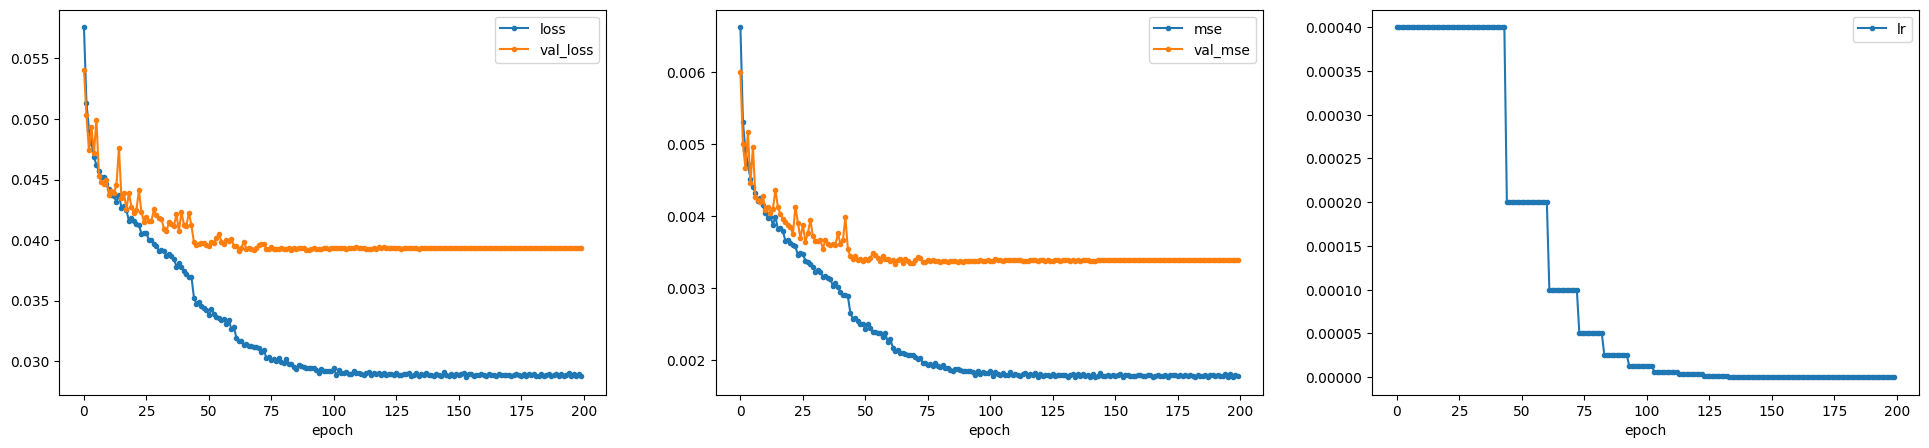

In [7]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(24,5))
plot_history(history, ['loss', 'val_loss'], ['mse', 'val_mse'], ['lr'])

# Validation

d:\anaconda3\envs\care\lib\site-packages\csbdeep\utils\plot_utils.py:55: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return _plot_some(arr=arr, title_list=title_list, pmin=pmin, pmax=pmax, cmap=cmap, **imshow_kwargs)


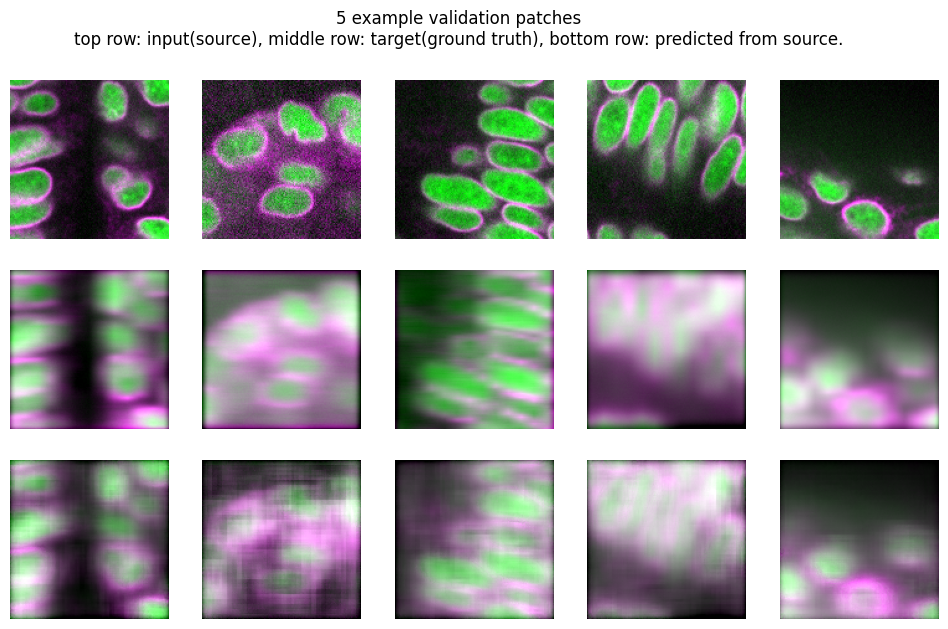

In [8]:
plt.figure(figsize=(12,7))
predict_res = model.keras_model.predict(Y_val[:5])
plot_some(Y_val[:5], X_val[:5], predict_res, pmax=99.5)
plt.suptitle('5 example validation patches\n'
             'top row: input(source), '
             'middle row: target(ground truth), '
             'bottom row: predicted from source.')
plt.show()